In [1]:
import numpy as np
 
 
def py_intersect(string_1, string_2):
    """
    :param string_1: 字符串
    :param string_2: 字符串
    :return: 两字符串的交集
    """
    result = ''
    for char in string_1:
        if char in string_2 and char not in result:
            result += char
    return result
 
 
def dempster(mp1, mp2, P):
    """
    :param mp1: 证据源1，numpy数组，存储信度
    :param mp2: 证据源2，numpy数组，存储信度
    :param P: 辨识框架
    :return: 返回融合信度和冲突因子
    """
    l = len(P)  # 幂集长度，这里指恐怖分子数目
    mp = np.zeros((1, l), 'float64')  # 初始化最终结果mp
    k_matrix = np.zeros((l, l))  # 冲突因子乘子
    for k in range(l):
        tmp = P[k]
        f_matrix = np.zeros((l, l))  # 融合乘子
        for i in range(l):
            for j in range(l):
                tmp_ij = py_intersect(P[i], P[j])  # 有无交集
                if not tmp_ij:  # 若空集
                    k_matrix[i][j] = 1
                if tmp_ij == tmp:  # 若交集等于P[k]
                    f_matrix[i][j] = 1
        mp[0][k] = sum(sum(np.dot(mp1.T, mp2) * f_matrix))
    k = sum(sum(np.dot(mp1.T, mp2) * k_matrix))
    mp = mp / (1 - k)
    return mp, k
 
 


# Dempster’s method

In [4]:
m1 = np.array([[0.68, 0.22, 0.1]])
m2 = np.array([[0, 0.85, 0.15]])
 
P = ['A', 'B', 'C']
 
mp, k = dempster(m1, m2, P)
print(f'融合后信度为{mp}')
#print(f'冲突因子k = {k}')
       
        

融合后信度为[[0.         0.92574257 0.07425743]]


In [5]:
m1 = np.array([[0,0.92574257,0.07425743]])
m2 = np.array([[0.02, 0.46, 0.52]])
 
P = ['A', 'B', 'C']
 
mp, k = dempster(m1, m2, P)
print(f'融合后信度为{mp}')

融合后信度为[[0.         0.91686207 0.08313793]]


In [6]:
m1 = np.array([[0,0.91686207, 0.08313793]])
m2 = np.array([[0.7, 0.15, 0.15]])
 
P = ['A', 'B', 'C']
 
mp, k = dempster(m1, m2, P)
print(f'融合后信度为{mp}')

融合后信度为[[0.         0.91686207 0.08313793]]


In [7]:
m1 = np.array([[0,0.91686207, 0.08313793]])
m2 = np.array([[0.4, 0.02, 0.58]])
 
P = ['A', 'B', 'C']
 
mp, k = dempster(m1, m2, P)
print(f'融合后信度为{mp}')

融合后信度为[[0.         0.27551084 0.72448916]]


# Standard deviation method

In [2]:
        list = []
        predict_proba=np.array([[0.68,0,0.02,0.7,0.4],[0.22,0.85,0.46,0.15,0.02],[0.1,0.15,0.52,0.15,0.58]])
        b = ['KNN', 'LR','DT', 'RF','SVC']
        len_sf = len(b)  
        d = np.zeros([len_sf,len_sf])
        a=predict_proba
        d=np.zeros(len_sf)
        for i in range(len_sf):
            p=a[:,i]
            c = np.mean(p)   
            d[i]=np.sqrt(np.sum((p-c)**2))
        print(d)
        crd = np.zeros(len_sf)
        for i in range(len_sf):
            crd[i]=float(d[i])/sum(d)
        print('Crd:',crd,crd.shape)
        #print(w)
        A=np.zeros(3)
        for j in range(3):
            A[j] = sum(np.multiply(a[j,:],crd))
            # 加权平均证据WAE
    
        AA = A
        print('WAE:',AA) 
        m1 = np.array([AA])
        m2 = np.array([A])
        #print(m1,m2)
        P = ['A', 'B', 'C'] 
        mp, k = dempster(m1, m2, P)
        print(f'融合后信度为{mp}')
        #print(f'冲突因子k = {k}')
        mp1, k = dempster(mp, m2, P)
        print(f'融合后信度为{mp1}')
        #print(f'冲突因子k = {k}')
        mp2, k = dempster(mp1, m2, P)
        print(f'融合后信度为{mp2}')
        #print(f'冲突因子k = {k}')
        mp3, k = dempster(mp2, m2, P)
        print(f'融合后信度为{mp3}')
        #print(f'冲突因子k = {k}')
      

[0.43297421 0.64161255 0.38609153 0.44907312 0.40431011]
Crd: [0.18710575 0.27726685 0.16684583 0.19406274 0.17471883] (5,)
WAE: [0.33630027 0.38619296 0.27750677]
融合后信度为[[0.33337336 0.43962781 0.22699883]]
融合后信度为[[0.32507195 0.49227852 0.18264953]]
融合后信度为[[0.31223844 0.54299383 0.14476774]]
融合后信度为[[0.29589096 0.59090459 0.11320445]]


# Deng et al.

In [3]:
        list = []
        P = ['KNN', 'LR','DT', 'RF','SVC']
        len_sf = len(P)  
        m_between = np.zeros([len_sf,len_sf])
        for i in range(len_sf):
            for j in range(len_sf):
                m_between[i,j]=sum(np.multiply(predict_proba[:,i],predict_proba[:,j]))
                # m_between两个证据的内积=两个证据中，每个出现事件的概率乘积*（出现事件的交集/并集）
                # 对单个事件而不是集合事件而言，等同于对应事件的概率乘积之和
        print(m_between)
        d = np.zeros([len_sf,len_sf])
        sim = np.zeros([len_sf,len_sf])
        for i in range(len_sf):
            for j in range(len_sf):
                d[i,j]=np.sqrt(0.5*(m_between[i,i]+m_between[j,j]-2*m_between[i,j]))
                # d为两个证据间的距离，距离越小表示两个证据提出的意见越一致
                sim[i,j]=1-d[i,j]
                # sim为两个证据之间的相似度，越大代表两个证据之间的一致性越强
        print('D:',d)
        print('S:',sim)
        sup = np.zeros(len_sf)
        for i in range(len_sf):
            sup[i]=sum(sim[i,:])-sim[i,i]
            # sup为对每个证据的支持度，为两个证据之间的相似度之和减去该证据自己对自己的支持度
            # 证据对自己的支持度为1
        print('支持度:',sup)
        crd = np.zeros(len_sf)
        for i in range(len_sf):
            crd[i]=float(sup[i])/sum(sup)
            # crd为证据的可信度
            # 即为归一化的支持度，其他证据对该证据支持度越高，则可信度越高
        print('Crd:',crd)
        A = np.zeros(3)
        for i in range(3):
            A[i] = sum(np.multiply(predict_proba[i,:],crd))
            # 将可信度作为源权重，估计所有情况下数据出现的概率
        AA = A
        print('加权平均证据:',AA)
        m1 = np.array([AA])
        m2 = np.array([A])
        #print(m1,m2)
        P = ['A', 'B', 'C'] 
        mp, k = dempster(m1, m2, P)
        print(f'融合后信度为{mp}')
        #print(f'冲突因子k = {k}')
        mp1, k = dempster(mp, m2, P)
        print(f'融合后信度为{mp1}')
        #print(f'冲突因子k = {k}')
        mp2, k = dempster(mp1, m2, P)
        print(f'融合后信度为{mp2}')
        #print(f'冲突因子k = {k}')
        mp3, k = dempster(mp2, m2, P)
        print(f'融合后信度为{mp3}')
        print(f'冲突因子k = {1-k}')

[[0.5208 0.202  0.1668 0.524  0.3344]
 [0.202  0.745  0.469  0.15   0.104 ]
 [0.1668 0.469  0.4824 0.161  0.3188]
 [0.524  0.15   0.161  0.535  0.37  ]
 [0.3344 0.104  0.3188 0.37   0.4968]]
D: [[0.         0.65642974 0.57861905 0.06244998 0.41761226]
 [0.65642974 0.         0.38039453 0.7        0.71895758]
 [0.57861905 0.38039453 0.         0.58966092 0.41327957]
 [0.06244998 0.7        0.58966092 0.         0.38196859]
 [0.41761226 0.71895758 0.41327957 0.38196859 0.        ]]
S: [[1.         0.34357026 0.42138095 0.93755002 0.58238774]
 [0.34357026 1.         0.61960547 0.3        0.28104242]
 [0.42138095 0.61960547 1.         0.41033908 0.58672043]
 [0.93755002 0.3        0.41033908 1.         0.61803141]
 [0.58238774 0.28104242 0.58672043 0.61803141 1.        ]]
支持度: [2.28488898 1.54421815 2.03804594 2.26592052 2.06818201]
Crd: [0.22398115 0.1513753  0.19978383 0.22212173 0.20273799]
加权平均证据: [0.39288326 0.30721844 0.29989829]
融合后信度为[[0.45576215 0.27867997 0.26555788]]
融合后信度为[[0.5

# Xiao

In [4]:
        import math
        import scipy.stats
        list = []
        P = ['KNN', 'LR', 'RF', 'DT', 'SVM']
        len_sf = len(P) 
        BJSS= np.zeros(len_sf) 
        a=predict_proba
        BJS = np.zeros([len_sf,len_sf])
        M=np.zeros([3,5])
        for i in range(len_sf):
            for j in range(len_sf):
                p=a[:,i]
                q=a[:,j]
                M = (p + q)/2
                BJS[i,j]=0.5*scipy.stats.entropy(p, M, base=2)+0.5*scipy.stats.entropy(q, M, base=2)
        print(BJS)
        for i in range(len_sf):
            BJSS[i]=sum(BJS[i,:])/4
        print('S:',BJSS)
        sup = np.zeros(len_sf)
        for i in range(len_sf):
            sup[i]=1/BJSS[i]
        # 证据对自己的支持度为1
        print('sup:',sup)
        crd = np.zeros(len_sf)
        for i in range(len_sf):
            crd[i]=float(sup[i])/sum(sup)
            # crd为证据的可信度
            # 即为归一化的支持度，其他证据对该证据支持度越高，则可信度越高
        #测量证据的信息量
        V = np.zeros(3)
        d= np.zeros(5)
       
        IV=[] 
        for i in range(5):
            c=a[:,i]
            for j in range(3):
                if c[j] == 0:         # 判断变量是否为 python 
                    V[j] = 0           # 条件成立时设置标志为真
         
                else:
                   V[j]=c[j]*np.log2(c[j])
      
            d = np.sum(V)    
            IV0=np.exp(-d)
    
            IV.append(IV0)
    
   
        print(IV)
        
        
        #归一化
        IVV = np.zeros(len_sf)
        for i in range(len_sf):
            IVV[i]=float(IV[i])/sum(IV)
        #归一化
        IVV = np.zeros(len_sf)
        for i in range(len_sf):
            IVV[i]=float(IV[i])/sum(IV)
        Acrd = np.zeros(len_sf)
        Acrd = np.multiply(crd,IVV)
        #归一化
        Acrdd = np.zeros(len_sf)
        for i in range(len_sf):
            Acrdd[i]=float(Acrd[i])/sum(Acrd)
        A = np.zeros(3)
        for i in range(3):
            A[i] = sum(np.multiply(a[i,:],Acrdd))
            #将可信度作为源权重，估计所有情况下数据出现的概率
        AA = A
        print(AA) 
        m1 = np.array([AA])
        m2 = np.array([A])
        #print(m1,m2)
        P = ['A', 'B', 'C'] 
        mp, k = dempster(m1, m2, P)
        print(f'融合后信度为{mp}')
        #print(f'冲突因子k = {k}')
        mp1, k = dempster(mp, m2, P)
        print(f'融合后信度为{mp1}')
        #print(f'冲突因子k = {k}')
        mp2, k = dempster(mp1, m2, P)
        print(f'融合后信度为{mp2}')
        #print(f'冲突因子k = {k}')
        mp3, k = dempster(mp2, m2, P)
        print(f'融合后信度为{mp3}')
        #print(f'冲突因子k = {k}')
        

[[0.         0.48647496 0.42811755 0.00854112 0.23199924]
 [0.48647496 0.         0.13050957 0.54507985 0.66385605]
 [0.42811755 0.13050957 0.         0.43162845 0.33320818]
 [0.00854112 0.54507985 0.43162845 0.         0.1680146 ]
 [0.23199924 0.66385605 0.33320818 0.1680146  0.        ]]
S: [0.28878322 0.45648011 0.33086594 0.28831601 0.34926952]
sup: [3.4628051  2.19067596 3.02237214 3.46841651 2.86311844]
[3.290744043129797, 1.840137514034092, 3.061145023182995, 3.2585779847902048, 2.9965330627534037]
[0.43261015 0.27056236 0.29682749]
融合后信度为[[0.53707862 0.21007734 0.25284404]]
融合后信度为[[0.63789912 0.15605009 0.20605079]]
融合后信度为[[0.7274698  0.11130064 0.16122956]]
融合后信度为[[0.80143948 0.07668742 0.1218731 ]]


# Zhu et al.

In [5]:
        list = []
        b = ['KNN', 'LR','DT', 'RF','SVC']
        len_sf = len(b)  
        d = np.zeros([len_sf,len_sf])
        a=predict_proba
        for i in range(len_sf):
            for j in range(len_sf):
                p=a[:,i]
                q=a[:,j]
                M = (p + q)/2
                d[i,j]=1/np.sqrt(2)*np.linalg.norm(np.sqrt(p)-np.sqrt(q))
        print('D:',d)
        dd= np.zeros(len_sf) 
        for i in range(len_sf):
            dd[i]=sum((d[i,:])-d[i,i])/4
       
        sup = np.zeros(len_sf)
        for i in range(len_sf):
            sup[i]=1/dd[i]
            # sup为对每个证据的支持度，为两个证据之间的相似度之和减去该证据自己对自己的支持度
            # 证据对自己的支持度为1

       
        #测量证据的信息量
        
        crd = np.zeros(len_sf)
        crd = np.multiply(sup,IV)
        #归一化
        Acrd = np.zeros(len_sf)
        for i in range(len_sf):
            Acrd[i]=float(crd[i])/sum(crd)
        
        
        A = np.zeros(3)
        for i in range(3):
            A[i] = sum(np.multiply(a[i,:],Acrd))
            #将可信度作为源权重，估计所有情况下数据出现的概率
        
        AA = A
        print(AA) 
        m1 = np.array([AA])
        m2 = np.array([A])
        #print(m1,m2)
        P = ['A', 'B', 'C'] 
        mp, k = dempster(m1, m2, P)
        print(f'融合后信度为{mp}')
        #print(f'冲突因子k = {k}')
        mp1, k = dempster(mp, m2, P)
        print(f'融合后信度为{mp1}')
        #print(f'冲突因子k = {k}')
        mp2, k = dempster(mp1, m2, P)
        print(f'融合后信度为{mp2}')
        #print(f'冲突因子k = {k}')
        mp3, k = dempster(mp2, m2, P)
        print(f'融合后信度为{mp3}')
        #print(f'冲突因子k = {k}')
        

D: [[0.         0.66715107 0.58071198 0.07706464 0.41388334]
 [0.66715107 0.         0.30889362 0.70208873 0.75806222]
 [0.58071198 0.30889362 0.         0.58285083 0.51522756]
 [0.07706464 0.70208873 0.58285083 0.         0.34802278]
 [0.41388334 0.75806222 0.51522756 0.34802278 0.        ]]
[0.42831465 0.275197   0.29648836]
融合后信度为[[0.52854387 0.21819388 0.25326225]]
融合后信度为[[0.62620021 0.16609459 0.20770519]]
融合后信度为[[0.71427313 0.12172712 0.16399974]]
融合后信度为[[0.78837377 0.08632488 0.12530135]]


# Proposed method

In [6]:
        from fractions import Fraction
        import scipy.stats
        list = []
        b = ['KNN', 'LR','DT', 'RF','SVC']
        len_sf = len(b)  
        d = np.zeros([len_sf,len_sf])
        a=predict_proba
        d=np.zeros(len_sf)
        for i in range(len_sf):
            p=a[:,i]
            c = np.mean(p)   
            d[i]=1/np.sqrt(2)*np.linalg.norm(np.sqrt(p)-np.sqrt(c))
        print('D:',d)
        crd = np.zeros(len_sf)
        for i in range(len_sf):
            crd[i]=float(1/d[i])/sum(1/d)
            # crd为证据的可信度
        print('w1:',crd)
        BJS = np.zeros([len_sf,len_sf])
        for i in range(len_sf):
            for j in range(len_sf):
                p=a[:,i]
                q=a[:,j]
                M = (p + q)/2
                BJS[i,j]=0.5*scipy.stats.entropy(p, M, base=2)+0.5*scipy.stats.entropy(q, M, base=2)
        print('BJS:',BJS)
        BJSS= np.zeros(len_sf) 
        for i in range(len_sf):
            BJSS[i]=sum((BJS[i,:])-BJS[i,i])/4
        print('BJSS:',BJSS)
        sup1 = np.zeros(len_sf)
        for i in range(len_sf):
            sup1[i]=1/BJSS[i]
        print('sup1:',sup1) 
        crd1 = np.zeros(len_sf)
        for i in range(len_sf):
            crd1[i]=float(sup1[i])/sum(sup1)
        print('crd1:',crd1)
        Acrd = np.zeros(len_sf)
       
        Acrd = np.multiply(crd,crd1)
        print(Acrd)
        Acrdd = np.zeros(len_sf)
        for i in range(len_sf):
            Acrdd[i]=float(Acrd[i])/sum(Acrd)
        A=np.zeros(3)
        for j in range(3):
            A[j] = sum(np.multiply(a[j,:],Acrdd))
            # 加权平均证据WAE
    
        AA = A
        print('WAE:',AA) 
        m1 = np.array([AA])
        m2 = np.array([A])
        #print(m1,m2)
        P = ['A', 'B', 'C'] 
        mp, k = dempster(m1, m2, P)
        print(f'融合后信度为{mp}')
        #print(f'冲突因子k = {k}')
        mp1, k = dempster(mp, m2, P)
        print(f'融合后信度为{mp1}')
        #print(f'冲突因子k = {k}')
        mp2, k = dempster(mp1, m2, P)
        print(f'融合后信度为{mp2}')
        #print(f'冲突因子k = {k}')
        mp3, k = dempster(mp2, m2, P)
        print(f'融合后信度为{mp3}')
        #print(f'冲突因子k = {k}')
          

D: [0.26557354 0.49406736 0.33232384 0.26408429 0.33690519]
w1: [0.24209682 0.13013308 0.19346944 0.24346207 0.19083858]
BJS: [[0.         0.48647496 0.42811755 0.00854112 0.23199924]
 [0.48647496 0.         0.13050957 0.54507985 0.66385605]
 [0.42811755 0.13050957 0.         0.43162845 0.33320818]
 [0.00854112 0.54507985 0.43162845 0.         0.1680146 ]
 [0.23199924 0.66385605 0.33320818 0.1680146  0.        ]]
BJSS: [0.28878322 0.45648011 0.33086594 0.28831601 0.34926952]
sup1: [3.4628051  2.19067596 3.02237214 3.46841651 2.86311844]
crd1: [0.23074002 0.14597317 0.20139228 0.23111393 0.1907806 ]
[0.05586143 0.01899594 0.03896325 0.05626748 0.0364083 ]
WAE: [0.44899374 0.26890274 0.28210352]
融合后信度为[[0.57030581 0.20455856 0.22513563]]
融合后信度为[[0.68359926 0.14684744 0.1695533 ]]
融合后信度为[[0.77851863 0.10015871 0.12132265]]
融合后信度为[[0.85109025 0.06557681 0.08333294]]


In [1]:
import matplotlib.pyplot as plt
import numpy as np
w1=np.array([[0,         0.92574257, 0.07425743],[0,         0.91686207, 0.08313793],[0,         0.91686207, 0.08313793],[0,         0.27551084, 0.72448916]])
w2=np.array([[0.33337336, 0.43962781, 0.22699883],[0.32507195, 0.49227852, 0.18264953],[0.31223844, 0.54299383, 0.14476774],[0.29589096, 0.59090459, 0.11320445]])

w3=np.array([[0.45576215, 0.27867997, 0.26555788],[0.52004741, 0.24865328, 0.23129931],[0.58364032, 0.21821284, 0.19814684],[0.64453288, 0.18843599,0.16703113]])


w4=np.array([[0.53707862, 0.21007734, 0.25284404],[0.63789912, 0.15605009, 0.20605079],[0.7274698,  0.11130064, 0.16122956],[0.80143948, 0.07668742, 0.1218731]])
w5=np.array([[0.52854387, 0.21819388, 0.25326225],[0.62620021, 0.16609459, 0.20770519],
[0.71427313, 0.12172712, 0.16399974],[0.78837377, 0.08632488, 0.12530135]])
w6=np.array([[0.57030581, 0.20455856, 0.22513563],[0.68359926, 0.14684744, 0.1695533],[0.77851863, 0.10015871, 0.12132265],
[0.85109025, 0.06557681, 0.08333294]])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


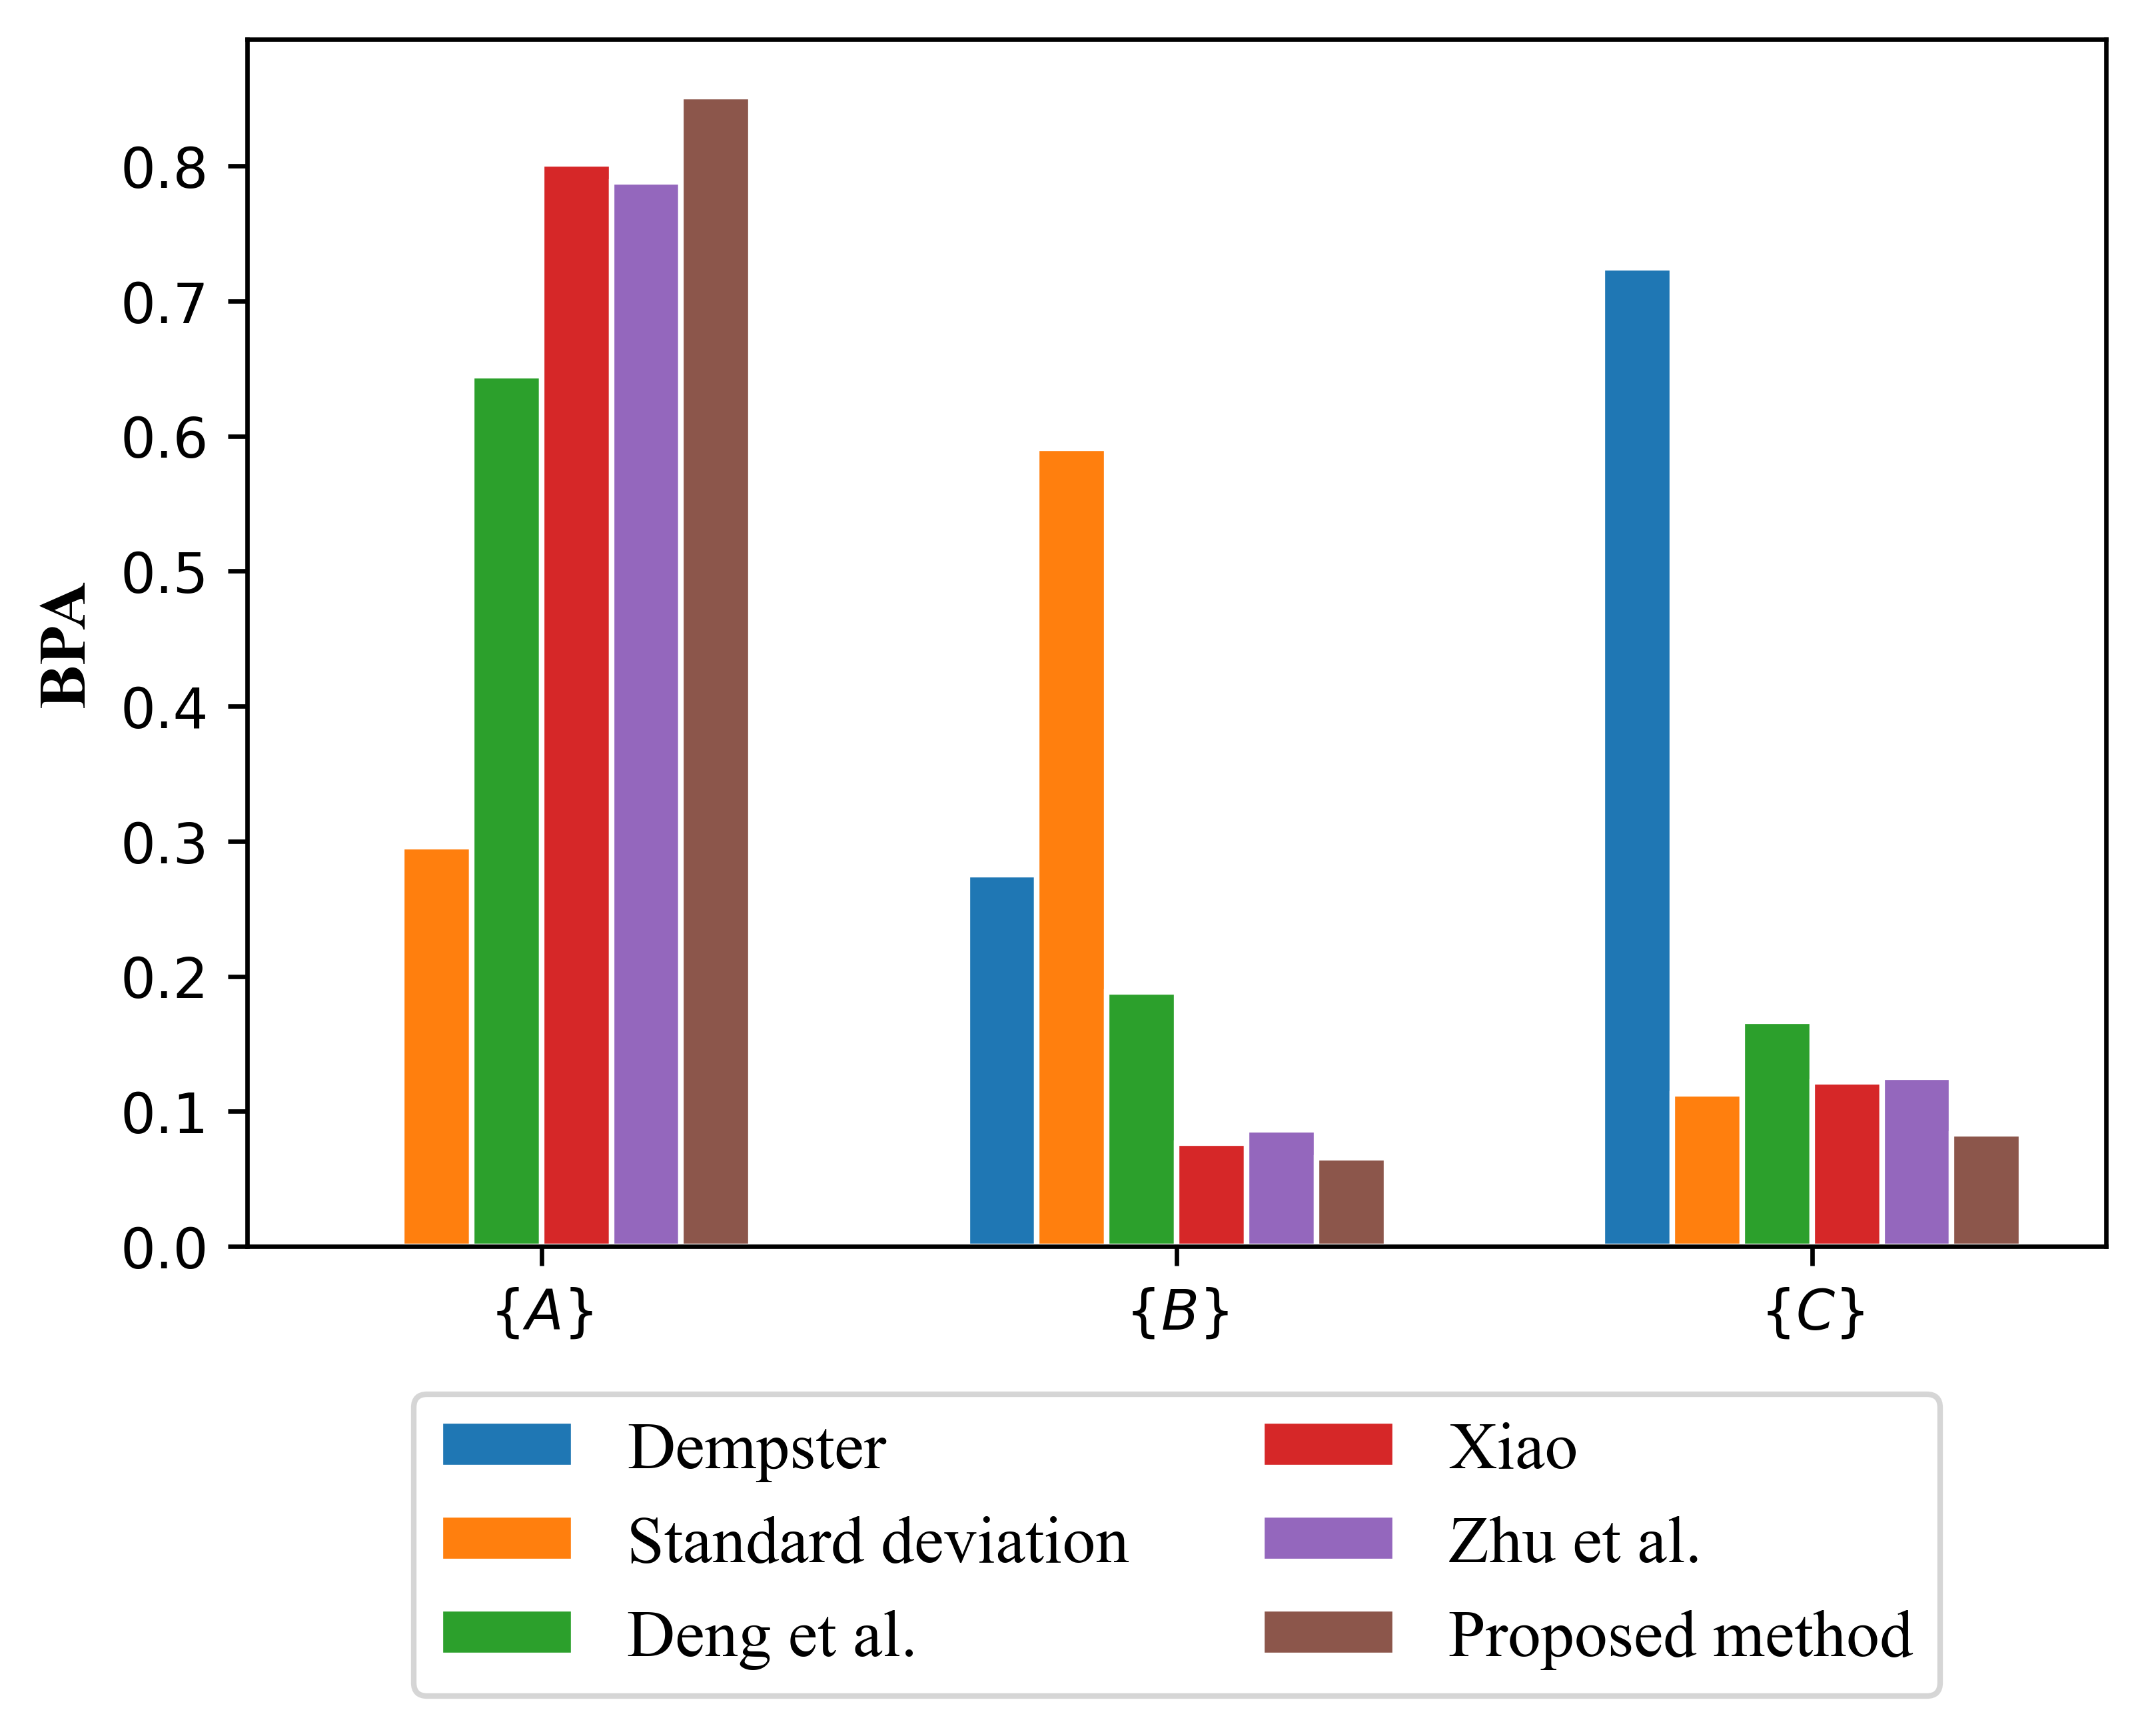

In [3]:

plt.figure(dpi=600)
barWidth = 0.11
# 设置柱子的高度
bars1=w1[3,:]

bars2=w2[3,:]
bars3=w3[3,:]
bars4=w4[3,:]
bars5=w5[3,:]
bars6=w6[3,:]
labels = ['{$A$}','{$B$}','{$C$}']
x = np.arange(len(labels))  # x轴刻度标签位置
r1 = np.arange(len(bars1))

r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
# 创建柱子
plt.bar(r1, bars1, width=barWidth, edgecolor='white',label='Dempster')
plt.bar(r2, bars2, width=barWidth, edgecolor='white',label='Standard deviation')
plt.bar(r3, bars3, width=barWidth, edgecolor='white',label='Deng et al.')
plt.bar(r4, bars4, width=barWidth, edgecolor='white',label='Xiao')
plt.bar(r5, bars5, width=barWidth, edgecolor='white',label='Zhu et al.')
plt.bar(r6, bars6, width=barWidth, edgecolor='white',label='Proposed method')
plt.ylabel('BPA',fontproperties="Times New Roman",fontsize=12,fontweight='bold') 
# 添加x轴名称
plt.xticks([r + barWidth for r in range(len(bars1))], ['{$A$}','{$B$}','{$C$}'])
# 创建图例
font = {'family':'Times New Roman'  #'serif', 
#         ,'style':'italic'
        
#         ,'color':'red'
        ,'size':12
       }


#ax.set_xticklabels(labels,fontproperties='Times New Roman') 
#plt.yticks(fontproperties='Times New Roman')#设
plt.xticks(x+2.5*barWidth, labels=labels)
plt.legend(bbox_to_anchor=(0.5, -0.4),loc=8,ncol=2,prop = font)

plt.savefig("Fig.3(b).eps",bbox_inches = 'tight')
# 展示图片
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


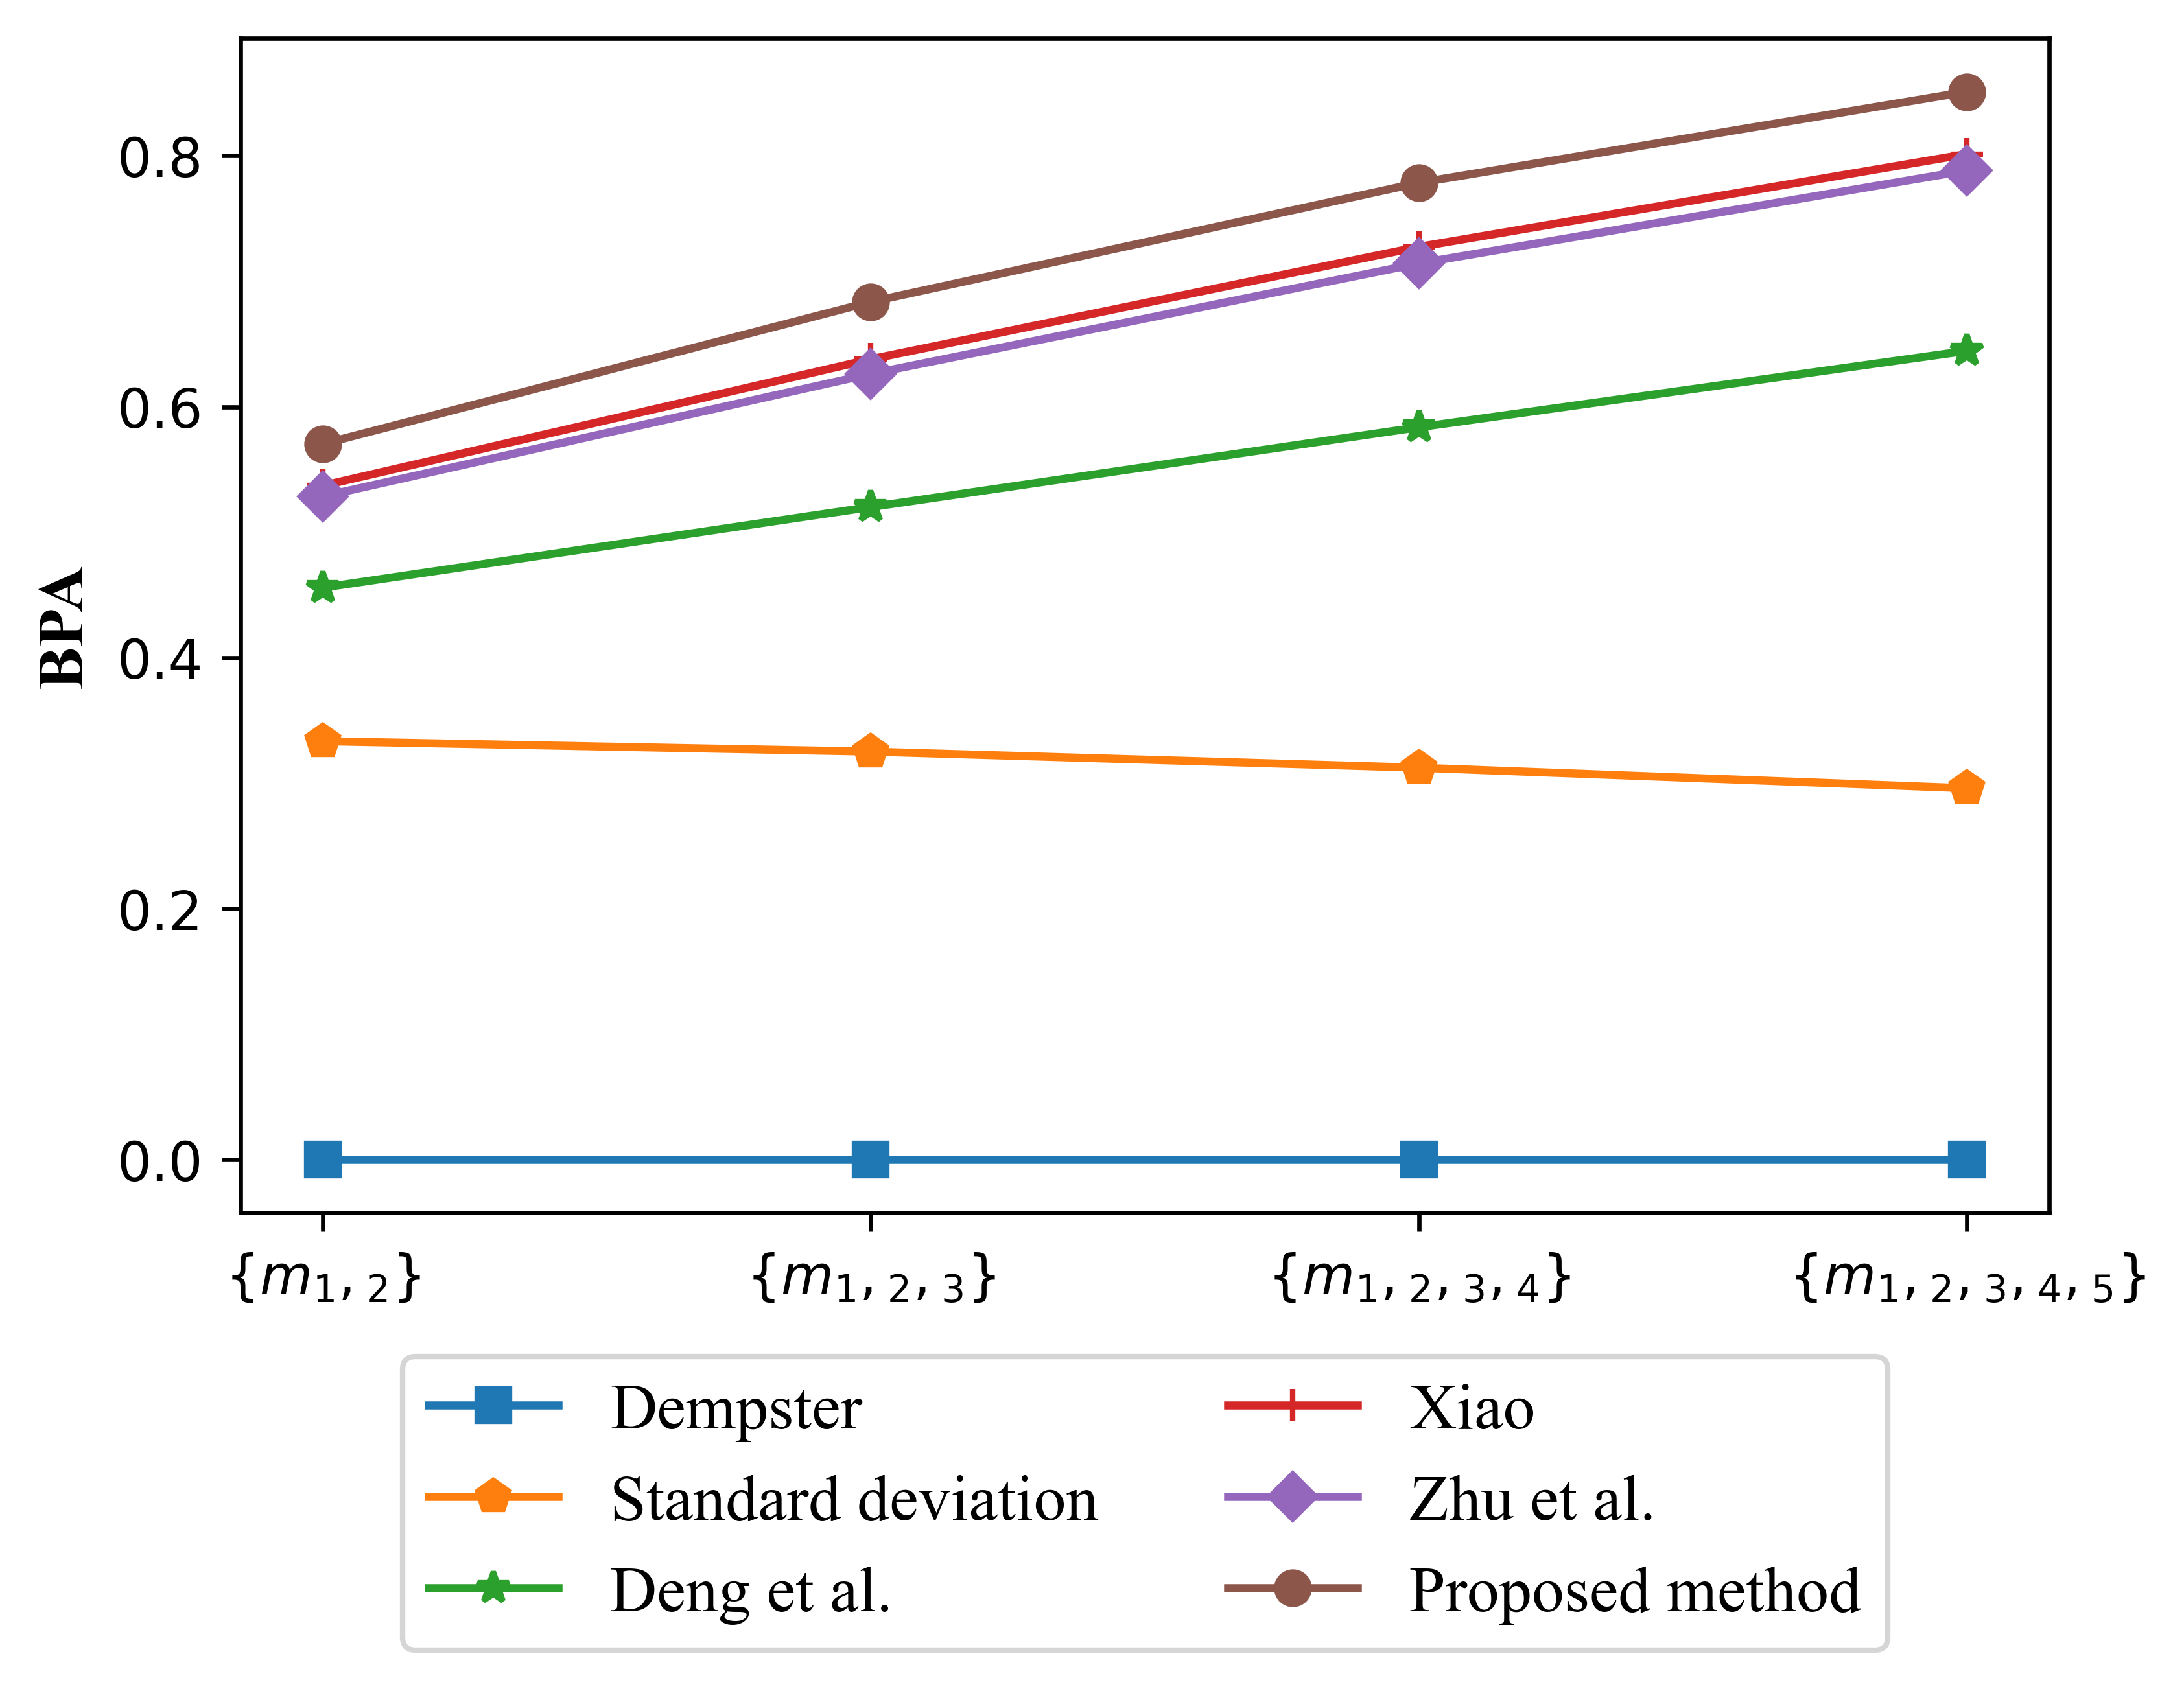

In [5]:
from matplotlib import pyplot as plt
x=np.arange(0, 4)
y1=w1[:,0]
y2=w2[:,0]
y3=w3[:,0]
y4=w4[:,0]
y5=w5[:,0]
y6=w6[:,0]
labels = ['{$m$$_1,_2$}', '{$m$$_1,_2,_3$}', '{$m$$_1,_2,_3,_4$}', '{$m$$_1,_2,_3,_4,_5$}']
plt.figure(dpi=600)
#x = np.arange(len(labels)) 
#plt.xlabel('Number of BPA')
#plt.ylim(0.65,0.92)
#plt.title('(b) BPAs for target A with fusing 4 times',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.ylabel('BPA',fontproperties="Times New Roman",fontsize=12,fontweight='bold')   
plt.plot(x, y1,linewidth =1.5,marker='s',color='#1f77b4',label='Dempster')
plt.plot(x, y2,linewidth =1.5,marker='p',color='#ff7f0e',label='Standard deviation')
plt.plot(x, y3,linewidth =1.5,marker='*',color='#2ca02c',label='Deng et al.')
plt.plot(x, y4,linewidth =1.5,marker='+',color='#d62728',label='Xiao')
plt.plot(x, y5,linewidth =1.5,marker='D',color='#9467bd',label='Zhu et al.')
plt.plot(x, y6,linewidth =1.5,marker='o',color='#8c564b',label='Proposed method')
#plt.plot(x, y4,linewidth =1.5,marker='D',label='Dempster')
font = {'family':'Times New Roman'  #'serif', 
#         ,'style':'italic'
        
#         ,'color':'red'
        ,'size':12
       }


#ax.set_xticklabels(labels,fontproperties='Times New Roman') 
#plt.yticks(fontproperties='Times New Roman')#设
plt.xticks(x, labels=labels)

plt.legend()
plt.legend(bbox_to_anchor=(0.5, -0.4),loc=8,ncol=2,prop = font)
plt.savefig("Fig.4(b).eps",bbox_inches = 'tight')
plt.show()